## Menentukan Pertanyaan Bisnis

Sebagai perusahaan yang bergerak di bidang e-commerce, bcomm perlu mengetahui segementasi pelanggan yang dapat dilihat dari frekuensi belanja, uang yang dikeluarkan, dan lama transaksi sejak transaksi terakhir. selain itu, perusahaan ini juga ingin mengetahui behaviour customernya agar dapat membuat keputusan yang tepat untuk menggunakan strategi marketing yang terbaik.

* Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
* Category produk apa saja yang memiliki sales paling tinggi?
* Produk apa yang paling banyak dan paling sedikit terjual?
* Produk apa saja yang memiliki score tertinggi dan terendah?
* Bagaimana behaviour pelanggan?
* Kapan terakhir belanja, berapa frekuensi belanja, dan berapa uang yang dikeluarkan (RFM Analysis)?

## Menyiapkan semua library yang dibuthkan

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Customer

In [66]:
customer_df = pd.read_csv("customers_dataset.csv")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Geolocation

In [67]:
geolocation_df = pd.read_csv("geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Order Items

In [68]:
order_items_df = pd.read_csv("order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Order Payment

In [69]:
order_payments_df = pd.read_csv("order_payments_dataset.csv")
order_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


Order Reviews

In [70]:
order_reviews_df = pd.read_csv("order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Order

In [71]:
orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Product Category

In [72]:
product_name_translation = pd.read_csv("product_category_name_translation.csv")
product_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Products

In [73]:
products_df = pd.read_csv("products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Seller

In [74]:
sellers_df = pd.read_csv("sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

Geolocation Check info

In [75]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [76]:
print("Jumlah duplicate : ", geolocation_df.duplicated().sum())

Jumlah duplicate :  261831


Order Items Check Info

In [77]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Order Payments Check Info

In [78]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Order Reviews Check Info

In [79]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [80]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Orders Check Info

In [81]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [82]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Product Category Check Info

In [83]:
product_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Product Check Info

In [84]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [85]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Seller Check Info

In [86]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


### Cleaning Data

Menghapus data duplikat pada kolom geolocation

In [87]:
#remove duplicates
geolocation_df.drop_duplicates(inplace=True)
print('Jumlah Duplikasi: ',geolocation_df.duplicated().sum())

Jumlah Duplikasi:  0


Mengubah tipe data date ke bentuk datetime

In [88]:
#change date column to datetime data type
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Melihat persentase missing value pada tabel order reviews

In [89]:
#Percentage missing value
jumlah_missing = pd.isnull(order_reviews_df).sum()
rasio = jumlah_missing.div(len(order_reviews_df))
rasio

review_id                  0.000000
order_id                   0.000000
review_score               0.000000
review_comment_title       0.883415
review_comment_message     0.587025
review_creation_date       0.000000
review_answer_timestamp    0.000000
dtype: float64

Menghapus kolom review comment title dan review comment message karena tidak akan digunakan untuk analisis

In [90]:
#drop column review_comment_title and review_comment_message
order_reviews_df.drop(['review_comment_title', 'review_comment_message'], axis=1, inplace=True)
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_creation_date     99224 non-null  object
 4   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Melihat persentasi missing value pada tabel orders

In [91]:
#Percentage missing value
jumlah_missing = pd.isnull(orders_df).sum()
rasio = jumlah_missing.div(len(orders_df))
rasio

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.001609
order_delivered_carrier_date     0.017930
order_delivered_customer_date    0.029817
order_estimated_delivery_date    0.000000
dtype: float64

Menghapus baris yang memiliki status canceled tetapi barang dikirim ke customer

In [92]:
#status canceled tetapi barang dikirim ke customer
delivered_but_canceled = orders_df[(orders_df['order_status']=='canceled') & ~(orders_df['order_delivered_customer_date'].isna())].index
orders_df.drop(delivered_but_canceled, inplace=True)
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99435 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99435 non-null  object
 1   customer_id                    99435 non-null  object
 2   order_status                   99435 non-null  object
 3   order_purchase_timestamp       99435 non-null  object
 4   order_approved_at              99275 non-null  object
 5   order_delivered_carrier_date   97652 non-null  object
 6   order_delivered_customer_date  96470 non-null  object
 7   order_estimated_delivery_date  99435 non-null  object
dtypes: object(8)
memory usage: 6.8+ MB


Menghapus baris yang memiliki status delivered tetapi barang tidak sampai di customer

In [93]:
#status delievered tetapi barang tidak sampai di customer
not_delivered_at_cust = orders_df[(orders_df['order_status']=='delivered') & (orders_df['order_delivered_customer_date'].isna())].index
orders_df.drop(not_delivered_at_cust, inplace=True)
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99427 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99427 non-null  object
 1   customer_id                    99427 non-null  object
 2   order_status                   99427 non-null  object
 3   order_purchase_timestamp       99427 non-null  object
 4   order_approved_at              99267 non-null  object
 5   order_delivered_carrier_date   97645 non-null  object
 6   order_delivered_customer_date  96470 non-null  object
 7   order_estimated_delivery_date  99427 non-null  object
dtypes: object(8)
memory usage: 6.8+ MB


Merging data untuk semua tabel

In [94]:
#merging order dan payment
orders_and_payments = pd.merge(
    left=orders_df,
    right=order_payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
#merging order, review, payment
orders_payments_reviews = pd.merge(
    left=orders_and_payments,
    right=order_reviews_df[['order_id','review_id','review_score']],
    how="left",
    left_on="order_id",
    right_on="order_id"
)

#merging order, payment, dan detail order
orders = pd.merge(
    left=orders_payments_reviews,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

#merging product dan product name
product = pd.merge(
    left=products_df,
    right=product_name_translation,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

#merging order dan customer
order_customer = pd.merge(
    left=orders,
    right=customer_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

#merging order, customer, product
df_clean = pd.merge(
    left=order_customer,
    right=product,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

df_clean = df_clean[df_clean['order_status'] == 'delivered']

In [95]:
df_clean.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date        1
order_delivered_customer_date       0
order_estimated_delivery_date       0
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
review_id                         861
review_score                      861
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name            1638
product_name_lenght              1638
product_desc

Melakukan cleaning setelah data di merging

In [96]:
#inputation missing value pada kolom order purchase timestamp
df_clean['order_approved_at'].fillna(df_clean['order_purchase_timestamp'], inplace=True)

#menghapus row yang missing value pada kolom order delivered carrier date
data_carrier_time_kosong = df_clean[df_clean['order_delivered_carrier_date'].isnull()].index
df_clean.drop(data_carrier_time_kosong, inplace=True)

#drop kolom payment yang null
payment_null = df_clean[df_clean['payment_value'].isnull()].index
df_clean.drop(payment_null, inplace=True)

#ubah tipe data kolom review score
df_clean = df_clean.astype({'review_score' : 'object'})

#handle missing value dengan 'not defined'
df_clean['review_id'].fillna('Not Defined', inplace=True)
df_clean['review_score'].fillna('Not Defined', inplace=True)

#drop column inrelate with product
df_clean.drop(['product_name_lenght', 
               'product_description_lenght',
               'product_photos_qty',
               'product_weight_g',
               'product_length_cm',
               'product_height_cm',
               'product_width_cm'], axis=1, inplace=True)

#handle missing value dengan 'not defined'
df_clean['product_category_name'].fillna('Not Defined', inplace=True)
df_clean['product_category_name_english'].fillna('Not Defined', inplace=True)

#mengubah smeua kolom waktu ke tipe data datetime
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", 
                    "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_columns:
    df_clean[column] = pd.to_datetime(df_clean[column])
    
# membuat kolom year_month untuk 
df_clean['year_month'] = df_clean['order_purchase_timestamp'].dt.to_period('M')

## Exploratory Data Analysis (EDA)

Melihat summary data customer

In [97]:
#summary data customer
customer_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Jumlah customer per kota

In [98]:
#melihat jumlah customer per kota
customer_df.groupby(['customer_city']).customer_id.nunique().sort_values(ascending=False).reset_index().head()

,customer_city,customer_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521


Jumlah customer per state

In [99]:
#melihat jumlah customer per state
customer_df.groupby(['customer_state']).customer_id.nunique().sort_values(ascending=False).reset_index().head()

,customer_state,customer_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045


Melihat jumlah user yang aktif belanja dalam 3 tahun terakhir

In [100]:
customer_id_in_orders_df =  df_clean['customer_id'].tolist()
customer_df["status"] = customer_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active


In [101]:
#melihat apakah customer aktif belanja atau tidak ()
customer_df.groupby(by="status").customer_id.count()

status
Active        96468
Non Active     2973
Name: customer_id, dtype: int64

Payment type yang paling banyak digunakan

In [102]:
#payment type yang paling populer digunakan
df_clean.groupby(['payment_type']).agg({
    'order_id': 'nunique',
    'payment_value': 'sum'
}).sort_values(by='order_id',ascending=False).reset_index()

,payment_type,order_id,payment_value
0,credit_card,74296,15267462.78
1,boleto,19191,3966153.08
2,voucher,3679,399426.07
3,debit_card,1484,247330.24


Top 5 kota terbanyak melakukan yang transaksi

In [103]:
#kota yang paling banyak bertransaksi
df_clean.groupby(['customer_city'])['order_id'].nunique().sort_values(ascending=False).reset_index().head()

,customer_city,order_id
0,sao paulo,15045
1,rio de janeiro,6601
2,belo horizonte,2697
3,brasilia,2071
4,curitiba,1489


Top 5 state terbanyak yang melakukan transaksi

In [104]:
#state yang paling banyak bertransaksi
df_clean.groupby(['customer_state'])['order_id'].nunique().sort_values(ascending=False).reset_index().head()

,customer_state,order_id
0,SP,40492
1,RJ,12350
2,MG,11354
3,RS,5344
4,PR,4923


Produk yang paling banyak terjual

In [105]:
#produk yang paling banyak terjual
df_clean.groupby(['product_category_name_english']).agg({
    'order_id': 'nunique',
    'payment_value': 'sum',
}).sort_values(by='payment_value',ascending=False).reset_index().head()

,product_category_name_english,order_id,payment_value
0,bed_bath_table,9272,1723932.14
1,health_beauty,8646,1625923.50
2,computers_accessories,6529,1563195.50
3,furniture_decor,6306,1407916.06
4,watches_gifts,5493,1388383.11


Melihat jumlah item per category

In [106]:
#melihat jumlah item per category
product.groupby(['product_category_name_english'])['product_id'].nunique().sort_values(ascending=False).reset_index().head()

,product_category_name_english,product_id
0,bed_bath_table,3029
1,sports_leisure,2867
2,furniture_decor,2657
3,health_beauty,2444
4,housewares,2335


Melihat jumlah item aktif transaksi

In [107]:
product_id_in_orders_df =  df_clean['product_id'].tolist()
product["status"] = product['product_id'].apply(lambda x: "Active" if x in product_id_in_orders_df else "Non Active")
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,status
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,Active
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,Active
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,Active
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,Active
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,Active


In [108]:
#melihat kateogri product yang aktif transaksi
product.groupby(["status"]).product_id.count()

status
Active        32213
Non Active      738
Name: product_id, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1:  Bagaimana performa penjualan dan revenue perusahaan dalam 3 tahun terakhir?

In [109]:
monthly_orders_df = df_clean.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_purchase_timestamp": "order_date",
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)
# monthly_orders_df = monthly_orders_df[monthly_orders_df['order_date'] >= '2018-01']
monthly_orders_df

,order_date,order_count,revenue
0,2016-10,265,62185.82
1,2016-11,0,0.00
2,2016-12,1,19.62
3,2017-01,750,178282.10
4,2017-02,1653,327928.86
5,2017-03,2546,508767.44
6,2017-04,2303,457050.31
7,2017-05,3545,706848.90
8,2017-06,3135,590223.90
9,2017-07,3872,720446.68


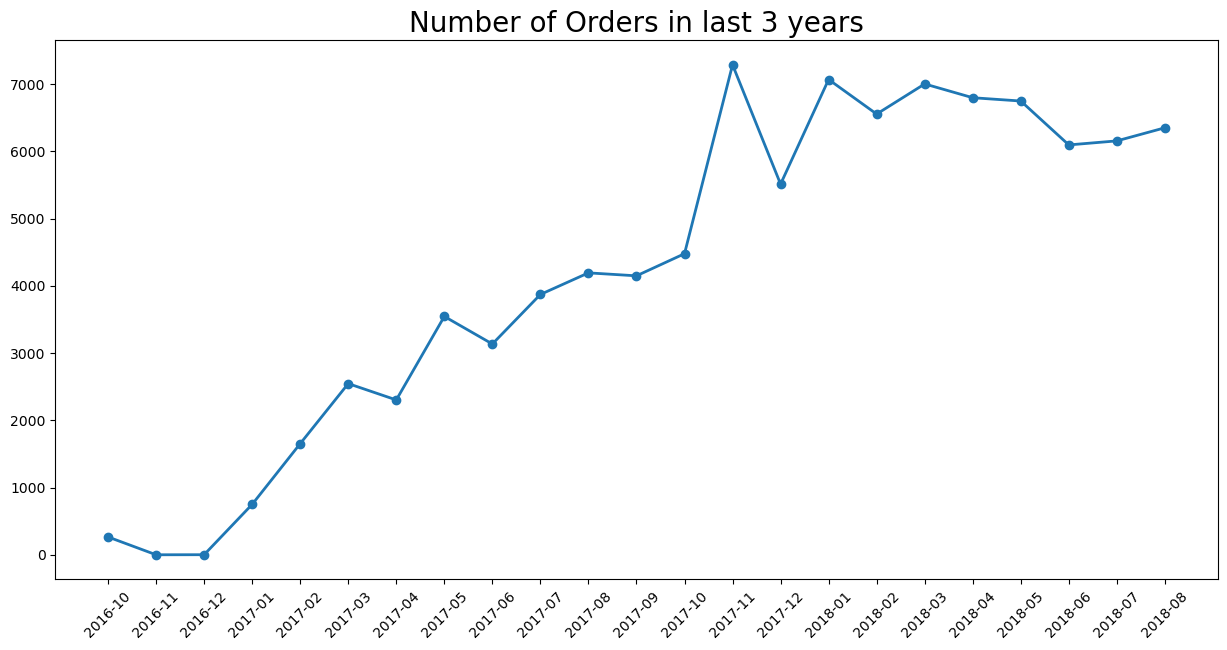

In [110]:
plt.figure(figsize=(15, 7))
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["order_count"], marker='o', linewidth=2)
plt.title("Number of Orders in last 3 years", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=45)
plt.show()

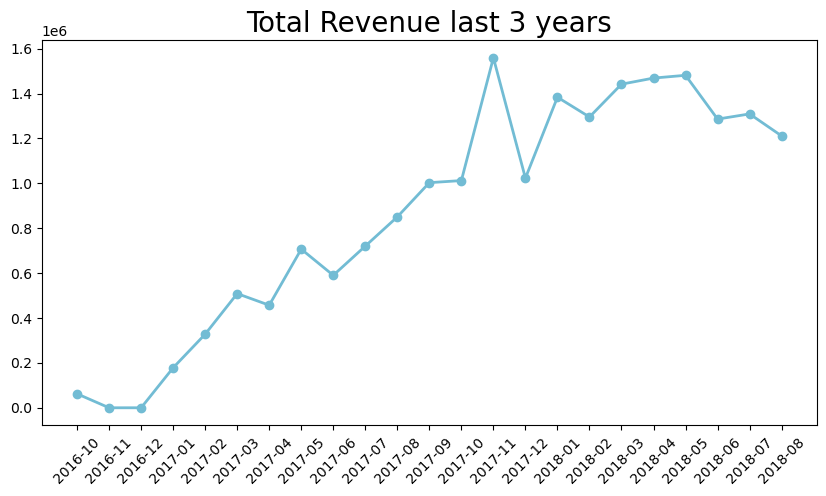

In [111]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue last 3 years", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=45)
plt.show()

Dari hasil visualisasi diatas, dapat dilihat bahwa trend penjualan mengalami peningkatan dari tahun 2016 sampai 2018. Namun terdapat fluktuasi penjualan pada bulan oktober 2017 yang cukup ekstream. Untuk tahun 2018, penjualan tidak mengalami peningkatan bahkan cenderung menurun

### Pertanyaan 2: Category produk apa saja yang memiliki sales paling tinggi dan terendah?

In [112]:
sales_by_cat = df_clean.groupby(['product_category_name_english']).agg({
    "order_id": "nunique",
    "payment_value": "sum"
})
sales_by_cat = sales_by_cat.reset_index()
sales_by_cat.rename(columns={
    "product_category_name_english": "category_product",
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)

# monthly_orders_df = monthly_orders_df[monthly_orders_df['order_date'] >= '2018-01']
top5_sales_cat = sales_by_cat.sort_values(by=('revenue'), ascending=False).head()
bottom5_sales_cat = sales_by_cat.sort_values(by=('revenue'), ascending=True).head()

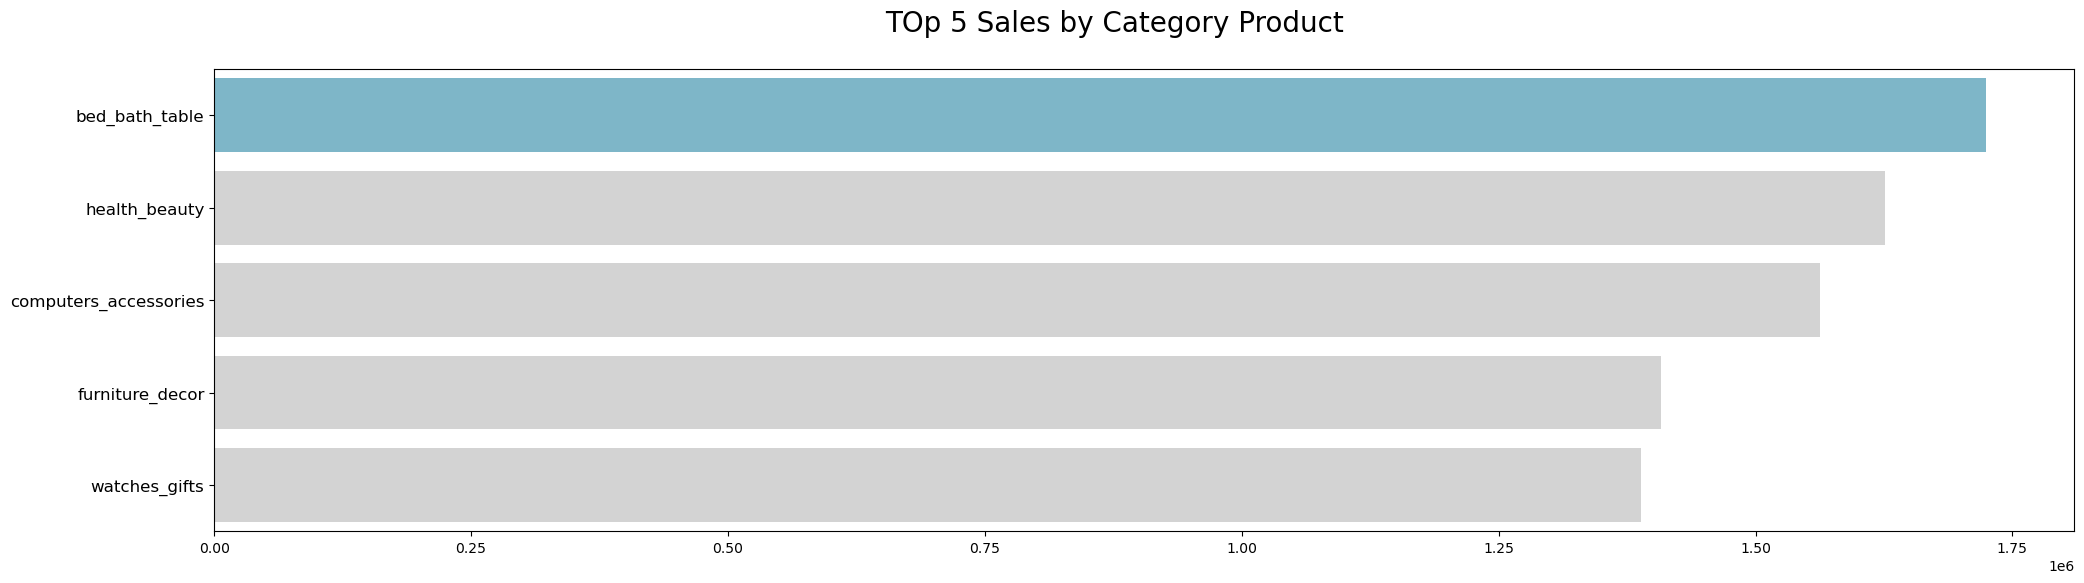

In [113]:
fig, ax = plt.subplots(nrows=1, figsize=(24, 6))

color_best = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="revenue", y="category_product", data=top5_sales_cat, palette=color_best, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis ='y', labelsize=12)

plt.suptitle("TOp 5 Sales by Category Product", fontsize=20)
plt.show()

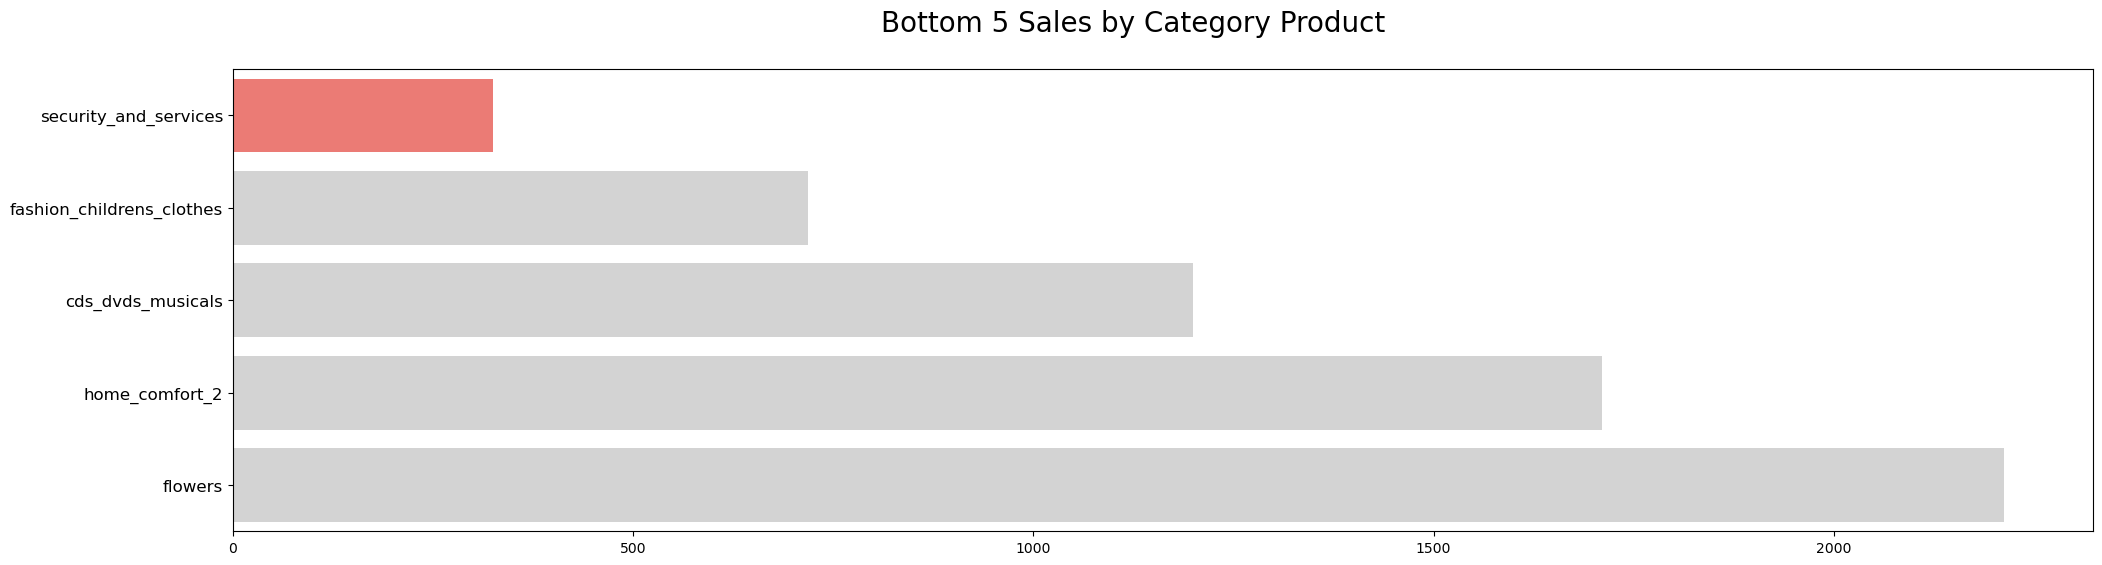

In [114]:
fig, ax = plt.subplots(nrows=1, figsize=(24, 6))

color_worst = ["#FF6961", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="revenue", y="category_product", data=bottom5_sales_cat, palette=color_worst, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis ='y', labelsize=12)

plt.suptitle("Bottom 5 Sales by Category Product", fontsize=20)
plt.show()

Dari hasil visualisasi diatas, dapat dilihat bahwa barang barang kamar tidur dan kamar mandi paling laku di pasaran sedangkan untuk barang barang security dan services kurang begitu diminati customer

### Pertanyaan 3: Produk apa yang paling banyak dan paling sedikit transaksi?

In [115]:
sum_order_items_df = df_clean.groupby('product_category_name_english').agg({
    "order_id":"nunique"
}).sort_values(by=("order_id"), ascending=False).reset_index()
sum_order_items_df.rename(columns={
    "product_category_name_english": "category_product",
    "order_id": "order_count"
}, inplace=True)
sum_order_items_df.head(10)

,category_product,order_count
0,bed_bath_table,9272
1,health_beauty,8646
2,sports_leisure,7529
3,computers_accessories,6529
4,furniture_decor,6306
5,housewares,5743
6,watches_gifts,5493
7,telephony,4093
8,auto,3809
9,toys,3803


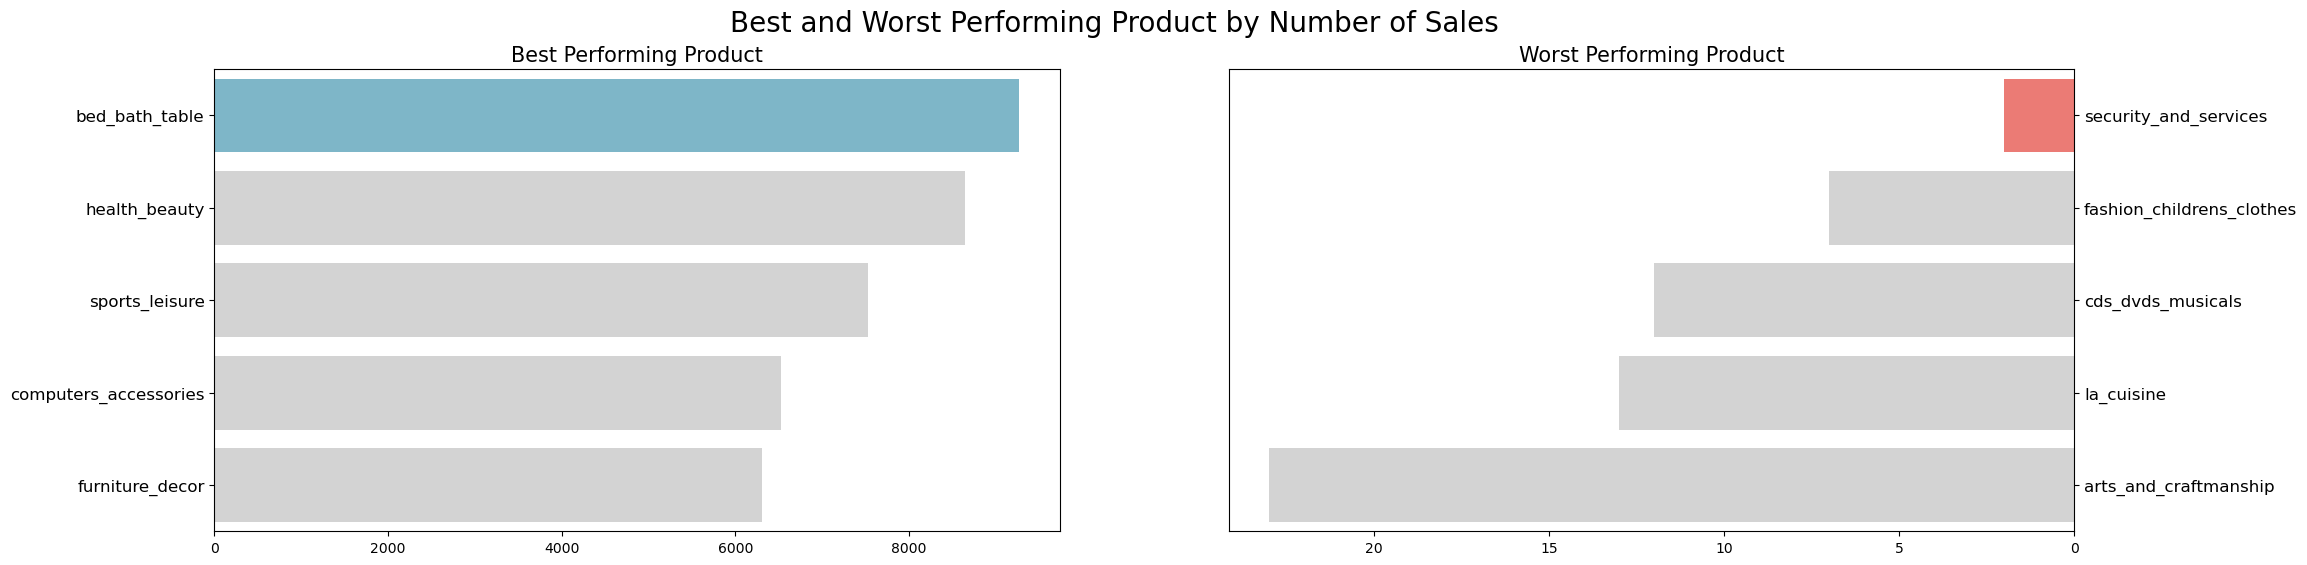

In [116]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

color_best = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
color_worst = ["#FF6961", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="order_count", y="category_product", data=sum_order_items_df.head(5), palette=color_best, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="order_count", y="category_product", data=sum_order_items_df.sort_values(by="order_count", ascending=True).head(5), palette=color_worst, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

dari hasil visualisasi diatas, rupiah penjualan dan kuantitas penjualan relatif sama dari segi performa, yaitu kategori bed bath table masih memegang kategori produk dengan kuantitas penjualan terbanyak sedangkan kategori security and services adalah produk dengan kuantitas penjualan paling sedikit

### Pertanyaan 4: Produk apa yang paling memiliki score tertinggi dan terendah?

In [117]:
df_rating = df_clean[df_clean['review_score'] != 'Not Defined']
df_rating = df_rating.astype({'review_score': 'float64'})
avg_rating_items_df = df_rating.groupby('product_category_name_english')['review_score'].mean().sort_values(ascending=False).reset_index()
avg_rating_items_df.rename(columns={
    "product_category_name_english": "category_product",
    "review_score": "avg_rating"
}, inplace=True)
avg_rating_items_df.head(10)

,category_product,avg_rating
0,fashion_childrens_clothes,5.000000
1,cds_dvds_musicals,4.642857
2,books_imported,4.525424
3,books_general_interest,4.501838
4,small_appliances_home_oven_and_coffee,4.453333
5,flowers,4.419355
6,costruction_tools_tools,4.415842
7,books_technical,4.400749
8,food_drink,4.387900
9,fashion_sport,4.366667


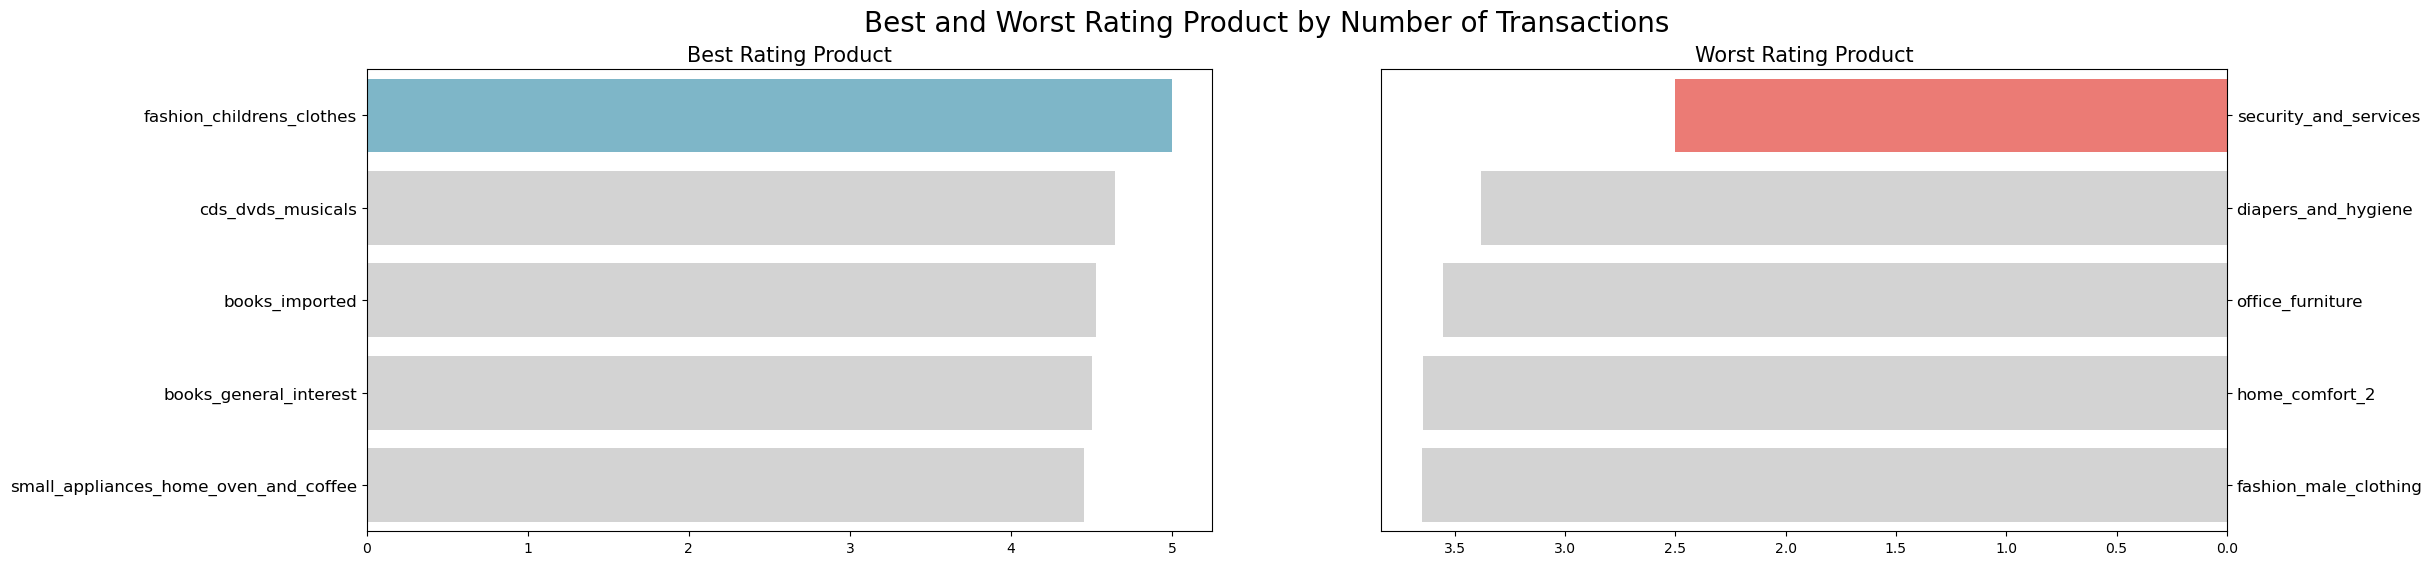

In [118]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

color_best = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
color_worst = ["#FF6961", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="avg_rating", y="category_product", data=avg_rating_items_df.head(5), palette=color_best, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Rating Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="avg_rating", y="category_product", data=avg_rating_items_df.sort_values(by="avg_rating", ascending=True).head(5), palette=color_worst, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Rating Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Rating Product by Number of Transactions", fontsize=20)
plt.show()

Dari hasil visualisasi diatas, kategori produk fashion children clothes adalah kategori yang memiliki rating atau tingkat kepuasan pelanggan yang paling tinggi, sedangkan kategori security and services memiliki rating yang paling kecil

### Pertanyaan 5: Bagaimana behaviour pelanggan?

By City

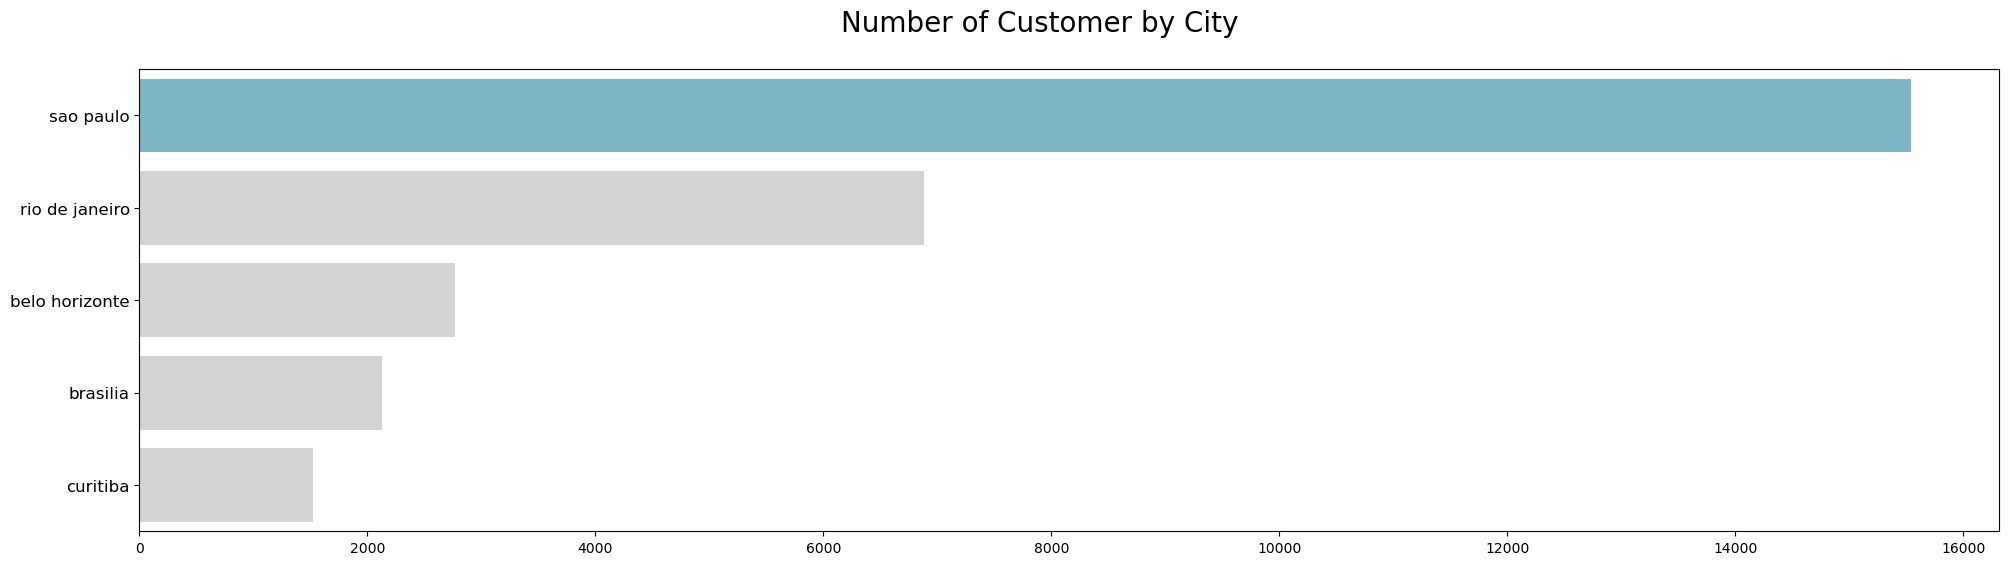

In [119]:
#melihat jumlah customer per kota
bycity_df = customer_df.groupby(['customer_city']).customer_id.nunique().sort_values(ascending=False).reset_index()
bycity_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bycity_df

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="customer_count", y="customer_city", data=bycity_df.head(5), palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis ='y', labelsize=12)

plt.suptitle("Number of Customer by City", fontsize=20)
plt.show()

Dapat dilihat dari barchart diatas bahwa kota Sao Paulo adalah kota dengan jumlah customer paling banyak

By State

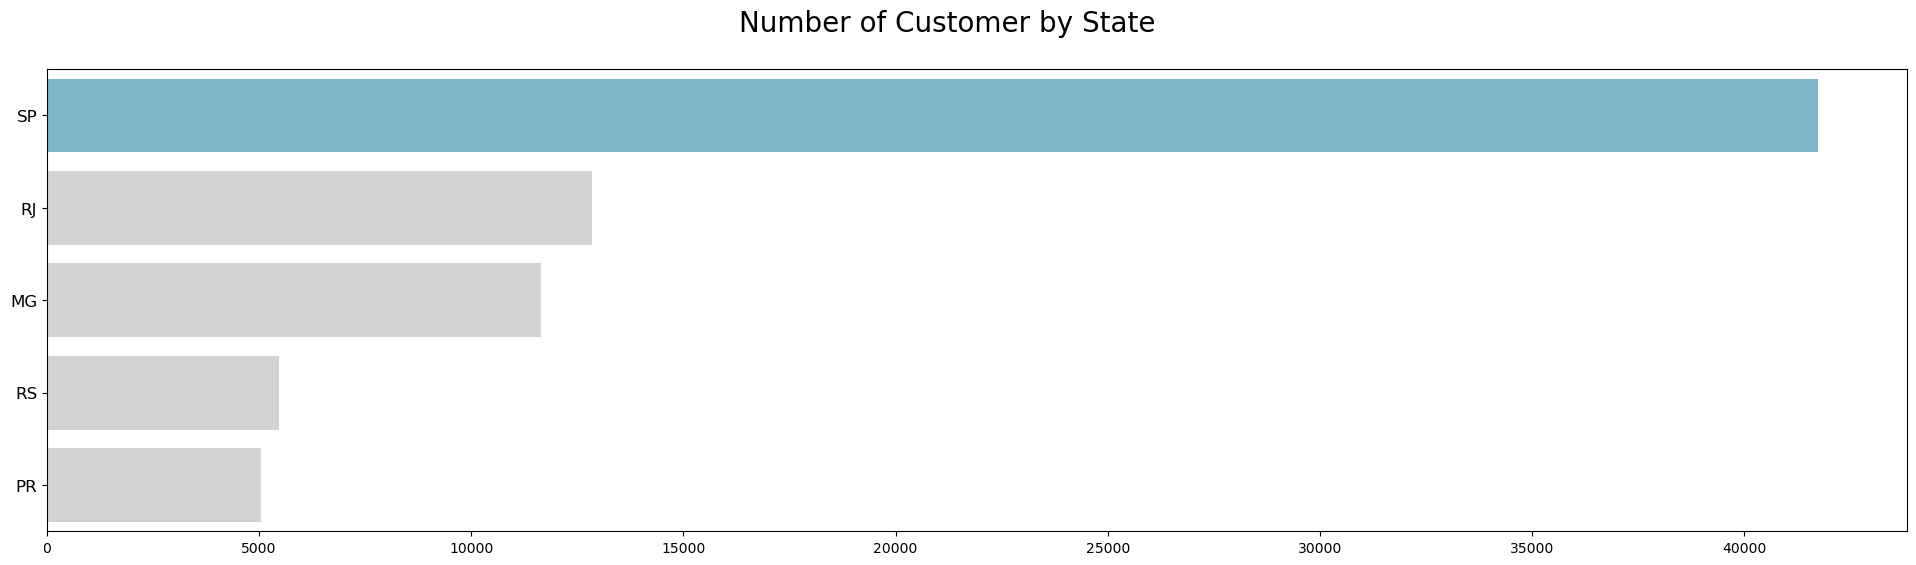

In [120]:
#melihat jumlah customer per kota
bystate_df = customer_df.groupby(['customer_state']).customer_id.nunique().sort_values(ascending=False).reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="customer_count", y="customer_state", data=bystate_df.head(5), palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis ='y', labelsize=12)

plt.suptitle("Number of Customer by State", fontsize=20)
plt.show()

Dapat dilihat dari barchart diatas bahwa state SP adalah state yang memiliki jumlah customer paling banyak

### Pertanyaan 6: RFM Analysis (Kapan terakhir belanja, berapa frekuensi belanja, dan berapa uang yang dikeluarkan)

In [121]:
rfm_df = df_clean.groupby(by=('customer_id'), as_index=False).agg({
    'order_purchase_timestamp': 'max',
    'order_id': 'count',
    'payment_value': 'sum'
})

rfm_df.columns = ['customer_id','max_order_timestamp','frequency','monetary']

rfm_df['max_order_timestamp'] = rfm_df['max_order_timestamp'].dt.date
recent_date = df_clean['order_purchase_timestamp'].dt.date.max()
rfm_df['recency'] = rfm_df['max_order_timestamp'].apply(lambda x: (recent_date - x).days)
rfm_df.drop('max_order_timestamp', axis=1, inplace=True)
rfm_df.set_index('customer_id', inplace=True)
rfm_df.head()

,frequency,monetary,recency
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,1,114.74,288
000161a058600d5901f007fab4c27140,1,67.41,409
0001fd6190edaaf884bcaf3d49edf079,1,195.42,547
0002414f95344307404f0ace7a26f1d5,1,179.35,378
000379cdec625522490c315e70c7a9fb,1,107.01,149


In [122]:
quantiles = rfm_df.quantile(q=[0.2,0.4,0.6,0.8])
quantiles

,frequency,monetary,recency
0.2,1.0,55.090,95.0
0.4,1.0,87.830,179.0
0.6,1.0,136.990,270.0
0.8,1.0,229.332,385.0


Menentukan score recency, frequency, dan monetery berdasarkan perhitungan quantile diatas

In [123]:
RFMScores= rfm_df.copy()
#Recency Scoring
def Rscoring(x,p,d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]:
        return 2
    else:
        return 1
#Frequency and Monetary Scoring
def FMscoring (x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]:
        return 4
    else:
        return 5
RFMScores['R']=RFMScores['recency'].apply(Rscoring, args=('recency',quantiles))
RFMScores['F']=RFMScores['frequency'].apply(FMscoring, args=('frequency',quantiles))
RFMScores['M']=RFMScores['monetary'].apply(FMscoring, args=('monetary',quantiles))
RFMScores['RFMgroup']=RFMScores.R.map(str)+RFMScores.F.map(str)+RFMScores.M.map(str)
RFMScores['Score']=RFMScores[['R','F','M']].sum(axis=1)
RFMScores['RFMgroup']=RFMScores['RFMgroup'].map(int)
RFMScores.head()

,frequency,monetary,recency,R,F,M,RFMgroup,Score
customer_id,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,1,114.74,288,2,1,3,213,6
000161a058600d5901f007fab4c27140,1,67.41,409,1,1,2,112,4
0001fd6190edaaf884bcaf3d49edf079,1,195.42,547,1,1,4,114,6
0002414f95344307404f0ace7a26f1d5,1,179.35,378,2,1,4,214,7
000379cdec625522490c315e70c7a9fb,1,107.01,149,4,1,3,413,8


Memberi nama cluster untuk customer berdasarkan score RFM yang sudah dibuat sebelumnya. terdapat juga aktivitas yang merepresentasikan score cluster tersebut beserta rekomendasi untuk setiap clusternya

In [124]:
def Sub_cluster_name(x):
    if (x==555) or (x==554) or (x==544) or (x==545) or (x==454) or (x==455) or (x==445):
        return "Champions"
    elif (x==543) or (x==444) or (x==435) or (x==355) or (x==354) or (x==345) or (x==344) or (x==335):
        return "Loyal Customers"
    elif (x==553) or (x==551) or (x==552) or (x==541) or (x==542) or (x==533) or (x==532) or (x==531) or (x==452) or (x==451) or (x==442) or (x==441) or (x==431) or (x==453) or (x==433) or (x==432) or (x==423) or (x==353) or (x==352) or (x==351) or (x==342) or (x==341) or (x==333) or (x==323):
        return "Potential Loyalist"
    elif (x==512) or (x==511) or (x==422) or (x==421) or (x==412) or (x==411) or (x==311):
        return "Recent Customers"
    elif (x==525) or (x==524) or (x==523) or (x==522) or (x==521) or (x==515) or (x==514) or (x==513) or (x==425) or (x==424) or (x==413) or (x==414) or (x==415) or (x==315) or (x==314) or (x==313):
        return "Promising"
    elif (x==535) or  (x==534) or (x==443) or (x==434) or (x==343) or (x==334) or (x==325) or (x==324): 
        return "Customers Needing Attention"
    elif (x==331) or (x==321) or (x==312) or (x==221) or (x==213):
        return "About To Sleep"
    elif (x==255) or (x==254) or (x==245) or (x==244) or (x==253) or (x==252) or (x==243) or (x==242) or (x==235) or (x==234) or (x==225) or (x==224) or (x==153) or (x==152) or (x==145) or (x==143) or (x==142) or (x==135) or (x==134) or (x==133) or (x==125) or (x==124): 
        return "At Risk"
    elif (x==155) or (x==154) or (x==144) or (x==214) or (x==215) or (x==115) or (x==114) or (x==113):
        return "Can’t Lose Them"
    elif (x==332) or (x==322) or (x==231) or (x==241) or (x==251) or (x==233) or (x==232) or (x==223) or (x==222) or (x==132) or (x==123) or (x==122) or (x==212) or (x==211):
        return "Hibernating"
    else:
        return "Lost"

def get_segment_info(segment):
    dict_rfm_reference = {
        "Champions": {
            "Segment": "Champions",
            "Activity": "Bought recently, buy often and spend the most!",
            "Actionable": "Reward them. Can be early adopters for new products. Will promote your brand."
        },
        "Loyal Customers": {
            "Segment": "Loyal Customers",
            "Activity": "Spend good money with us often. Responsive to promotions.",
            "Actionable": "Upsell higher value products. Ask for reviews. Engage them."
        },
        "Potential Loyalist": {
            "Segment": "Potential Loyalist",
            "Activity": "Recent customers, but spent a good amount and bought more than once.",
            "Actionable": "Offer membership / loyalty program, recommend other products."
        },
        
        
        "Recent Customers": {
            "Segment": "Recent Customers",
            "Activity": "Bought most recently, but not often.",
            "Actionable": "Provide on-boarding support, give them early success, start building relationship."
        },
        "Promising": {
            "Segment": "Promising",
            "Activity": "Recent shoppers, but haven’t spent much.",
            "Actionable": "Create brand awareness, offer free trials"
        },
        "Customers Needing Attention": {
            "Segment": "Customers Needing Attention",
            "Activity": "Above average recency, frequency and monetary values. May not have bought very recently though.",
            "Actionable": "Make limited time offers, Recommend based on past purchases. Reactivate them."
        },
        
        
        "About To Sleep": {
            "Segment": "About To Sleep",
            "Activity": "Below average recency, frequency and monetary values. Will lose them if not reactivated.",
            "Actionable": "Share valuable resources, recommend popular products / renewals at discount, reconnect with them."
        },
        "At Risk": {
            "Segment": "At Risk",
            "Activity": "Spent big money and purchased often. But long time ago. Need to bring them back!",
            "Actionable": "Send personalized emails to reconnect, offer renewals, provide helpful resources."
        },
        "Can’t Lose Them": {
            "Segment": "Can’t Lose Them",
            "Activity": "Made biggest purchases, and often. But haven’t returned for a long time.",
            "Actionable": "Win them back via renewals or newer products, don’t lose them to competition, talk to them."
        },
        
        
        "Hibernating": {
            "Segment": "Hibernating",
            "Activity": "Last purchase was long back, low spenders and low number of orders.",
            "Actionable": "Offer other relevant products and special discounts. Recreate brand value."
        },
        "Lost": {
            "Segment": "Lost",
            "Activity": "Lowest recency, frequency and monetary scores.",
            "Actionable": "Revive interest with reach out campaign, ignore otherwise."
        }
    }

    return dict_rfm_reference.get(segment, {})

segments = ["Champions","Loyal Customers","Potential Loyalist","Recent Customers","Promising","Customers Needing Attention","About To Sleep","At Risk","Can’t Lose Them","Hibernating","Lost"]

def activity(x):
    for i in segments:
        if x == i:
            info = get_segment_info(x)
            return info.get("Activity", "")
    
def actionable(x):
    for i in segments:
        if x == i:
            info = get_segment_info(x)
            return info.get("Actionable", "")
        
RFMScores['Cluster_name']=RFMScores['RFMgroup'].apply(Sub_cluster_name)
RFMScores['Activity']=RFMScores['Cluster_name'].apply(activity)
RFMScores['Actionable']=RFMScores['Cluster_name'].apply(actionable)
RFMScores = RFMScores.reset_index()
RFMScores.head()

,customer_id,frequency,monetary,recency,R,F,M,RFMgroup,Score,Cluster_name,Activity,Actionable
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,288,2,1,3,213,6,About To Sleep,"Below average recency, frequency and monetary ...","Share valuable resources, recommend popular pr..."
1,000161a058600d5901f007fab4c27140,1,67.41,409,1,1,2,112,4,Lost,"Lowest recency, frequency and monetary scores.","Revive interest with reach out campaign, ignor..."
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,547,1,1,4,114,6,Can’t Lose Them,"Made biggest purchases, and often. But haven’t...","Win them back via renewals or newer products, ..."
3,0002414f95344307404f0ace7a26f1d5,1,179.35,378,2,1,4,214,7,Can’t Lose Them,"Made biggest purchases, and often. But haven’t...","Win them back via renewals or newer products, ..."
4,000379cdec625522490c315e70c7a9fb,1,107.01,149,4,1,3,413,8,Promising,"Recent shoppers, but haven’t spent much.","Create brand awareness, offer free trials"


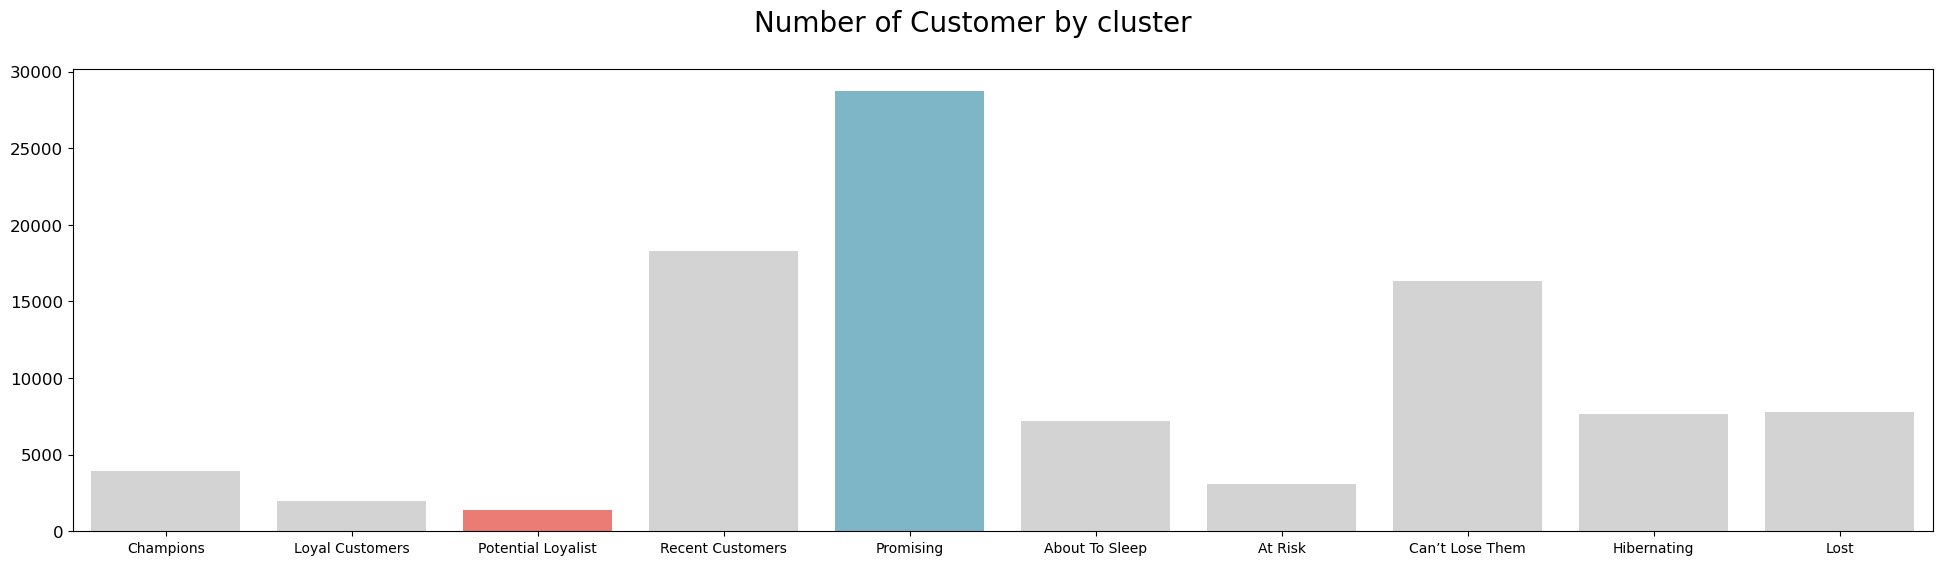

In [125]:
#melihat jumlah
sum_cust_cluster = RFMScores.groupby(['Cluster_name']).customer_id.nunique().sort_values(ascending=False).reset_index()
sum_cust_cluster.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))

colors = ["#D3D3D3", "#D3D3D3", "#FF6961", "#D3D3D3", "#72BCD4",
         "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

cluster_dict = {'Champions':1,'Loyal Customers':2,'Potential Loyalist':3, 'Recent Customers':4, 
              'Promising':5, 'Customers Needing Attention':6, 'About To Sleep':7, 'At Risk':8, 
              'Can’t Lose Them':9, 'Hibernating':10, 'Lost':11}
sum_cust_cluster=sum_cust_cluster.sort_values('Cluster_name', key = lambda x : x.apply (lambda x : cluster_dict[x]))

sns.barplot(x="Cluster_name", y="customer_count", data=sum_cust_cluster, palette=colors, ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis ='y', labelsize=12)

plt.suptitle("Number of Customer by cluster", fontsize=20)
plt.show()

Dapat dilihat dari hasil segmentasi customer berdasarkan recency, frequency, and monetery bahwa customer lebih cenderung berada di "Promising" yaitu tipe customer yang melakukan transaksi akhir akhir ini tetapi dalam hal recency masih kecil. Sementara itu segment "Potential Loyalist" adalah segment dengan jumlah customer yang paling sedikit. Tipe customer ini cenderung melakukan transaksi minimal 1 kali di akhir akhir ini, dan mengeluarkan uang yang cukup banyak untuk transaksi.

## Conclusion

1. **Bagaimana performa penjualan dan revenue perusahaan dalam 3 tahun terakhir?**
Dari hasil eksplorasi dan visualisasi, dapat dilihat bahwa trend penjualan mengalami peningkatan dari tahun 2016 sampai 2018. Namun terdapat fluktuasi penjualan pada bulan oktober 2017 yang cukup ekstream. Untuk tahun 2018, penjualan tidak mengalami peningkatan bahkan cenderung menurun
2. **Category produk apa saja yang memiliki sales paling tinggi?**
Dari hasil eksplorasi dan visualisasi, dapat dilihat bahwa barang barang kamar tidur dan kamar mandi paling laku di pasaran sedangkan untuk barang barang security dan services kurang begitu diminati customer
3. **Produk apa yang paling banyak dan paling sedikit terjual?**
Dari hasil eksplorasi dan visualisasi, amount penjualan dan kuantitas penjualan relatif sama dari segi performa, yaitu kategori bed bath table masih memegang kategori produk dengan kuantitas penjualan terbanyak sedangkan kategori security and services adalah produk dengan kuantitas penjualan paling sedikit
4. **Produk apa saja yang memiliki score tertinggi dan terendah?**
Dari hasil visualisasi diatas, kategori produk fashion children clothes adalah kategori yang memiliki rating atau tingkat kepuasan pelanggan yang paling tinggi, sedangkan kategori security and services memiliki rating yang paling kecil
5. **Bagaimana behaviour pelanggan?**
Customer di kota Sao Paulo adalah kota dengan jumlah customer paling banyak. Sementara untuk state SP adalah state yang memiliki jumlah customer paling banyak
6. **Kapan terakhir belanja, berapa frekuensi belanja, dan berapa uang yang dikeluarkan (RFM Analysis)?**
Rata rata customer melakukan transaksi sebanyak 1 kali, uang yang dikeluarkan sekitar 110.02, dan waktu terakhir belanja sekitar 221 hari.
Sementara untuk hasil segmentasi customer berdasarkan recency, frequency, and monetery bahwa customer lebih cenderung berada di "Promising" yaitu tipe customer yang melakukan transaksi akhir akhir ini tetapi dalam hal recency masih kecil. Sementara itu segment "Potential Loyalist" adalah segment dengan jumlah customer yang paling sedikit. Tipe customer ini cenderung melakukan transaksi minimal 1 kali di akhir akhir ini, dan mengeluarkan uang yang cukup banyak untuk transaksi.